<a href="https://colab.research.google.com/github/batra-ayush/PyTorch-Examples/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

In [2]:
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'), delimiter=',')

In [3]:
data

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       ...,
       [2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [4]:
labels = data[:,0]
data = data[:,1:]
data.shape
labels

array([6., 5., 7., ..., 2., 9., 5.])

In [5]:
print(data.shape)
print(labels.shape)

(20000, 784)
(20000,)


In [6]:
dataNorm = data/np.max(data)

In [7]:
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()

train_data, test_data, train_labels, test_labels = train_test_split(dataT,labelsT,test_size=0.2)

train_data = TensorDataset(train_data,train_labels)
test_data = TensorDataset(test_data,test_labels)



In [8]:
train_loader = DataLoader(train_data,batch_size=8,shuffle=True,drop_last=True)
test_loader = DataLoader(test_data,batch_size=128)

In [9]:
train_loader

In [10]:
# check all variables
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
data               ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm           ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT              Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
display            module           <module 'IPython.display'<...>ages/IPython/display.py'>
labels             ndarray          20000: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
labelsT            Tensor           tensor([6, 5, 7,  ..., 2, 9, 5])
nn                 module           <module 'torch.nn' from '<...>es/t

In [11]:
def createTheMNISNet():
  class mnisNet(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(784,64)
      self.hidden1 = nn.Linear(64,32)
      self.hidden2 = nn.Linear(32,32)
      self.output = nn.Linear(32,10)

    def forward(self,x):
      x = self.input(x)
      x = F.relu(x)
      x = self.hidden1(x)
      x = F.relu(x)
      x = self.hidden2(x)
      x = F.relu(x)
      x = self.output(x)
      return torch.log_softmax(x,axis=1) # we are using log_softmax, because I am using NLLLoss instead of CrossEntropy

  net = mnisNet()
  lossfun = nn.NLLLoss()
  optimizer = torch.optim.SGD(net.parameters(),lr=0.01)

  return net,lossfun,optimizer



In [12]:
# test the model with one batch

net,lossfun,optimizer = createTheMNISNet()

x,y = next(iter(train_loader))
yHat = net(x)

print(yHat)

loss = lossfun(yHat,y)

print(' Loss')
print(loss)

tensor([[-2.3448, -2.3759, -2.3496, -2.3026, -2.4286, -2.2535, -2.1683, -2.2640,
         -2.1803, -2.3936],
        [-2.3499, -2.3723, -2.3534, -2.3026, -2.4266, -2.2402, -2.1729, -2.2809,
         -2.1578, -2.4089],
        [-2.3436, -2.3766, -2.3426, -2.2974, -2.4466, -2.2478, -2.1643, -2.2592,
         -2.1790, -2.4088],
        [-2.3456, -2.3684, -2.3565, -2.2931, -2.4394, -2.2393, -2.1835, -2.2711,
         -2.1700, -2.3959],
        [-2.3409, -2.3765, -2.3474, -2.3006, -2.4293, -2.2473, -2.1782, -2.2617,
         -2.1739, -2.4065],
        [-2.3376, -2.3827, -2.3439, -2.2910, -2.4515, -2.2523, -2.1555, -2.2633,
         -2.1884, -2.3999],
        [-2.3467, -2.3769, -2.3551, -2.2892, -2.4286, -2.2427, -2.1721, -2.2832,
         -2.1684, -2.4005],
        [-2.3419, -2.3695, -2.3426, -2.3081, -2.4468, -2.2478, -2.1620, -2.2684,
         -2.1743, -2.4042]], grad_fn=<LogSoftmaxBackward0>)
 Loss
tensor(2.2803, grad_fn=<NllLossBackward0>)


In [13]:

def function2TrainTheModel():
  trainacc = []
  numepochs = 60
  net,lossfun,optimizer = createTheMNISNet()

  for epochi in range(numepochs):
    batchacc = []
    batch_acc = []
    for X,y in train_loader:
      yHat = net(X)
      loss = lossfun(yHat,y)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      batchacc = 100*torch.mean((torch.argmax(yHat,axis=1) == y).float())
      batch_acc.append(batchacc.item())
    trainacc.append(np.mean(batch_acc))

    finalacc = []
    testacc = []
    XX,YY = next(iter(test_loader))
    yPred = net(XX)
    testacc = (100*torch.mean((torch.argmax(yPred,axis=1) == YY).float())).item()

  return trainacc,testacc

In [14]:
trainacc,testacc = function2TrainTheModel()

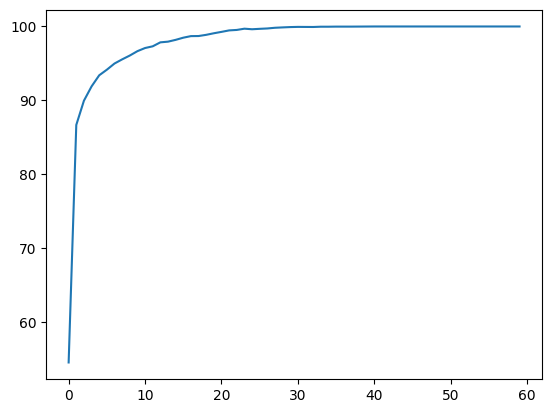

In [16]:
plt.plot(trainacc)

In [18]:
testacc

97.65625